# Computing Derivatives with FFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 12

In [2]:
# Create the function and its derivative 
n = 128
L = 30
dx = L/n
x = np.arange(-L/2, L/2, dx, dtype = complex)
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

In [3]:
# Computing derivative using FFT 
fhat = np.fft.fft(f)
kappa = 2*np.pi/L * np.arange(-n/2, n/2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa * fhat * 1j
dfFFT = np.real(np.fft.ifft(dfhat))

C:\src\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\src\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\src\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
C:\src\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


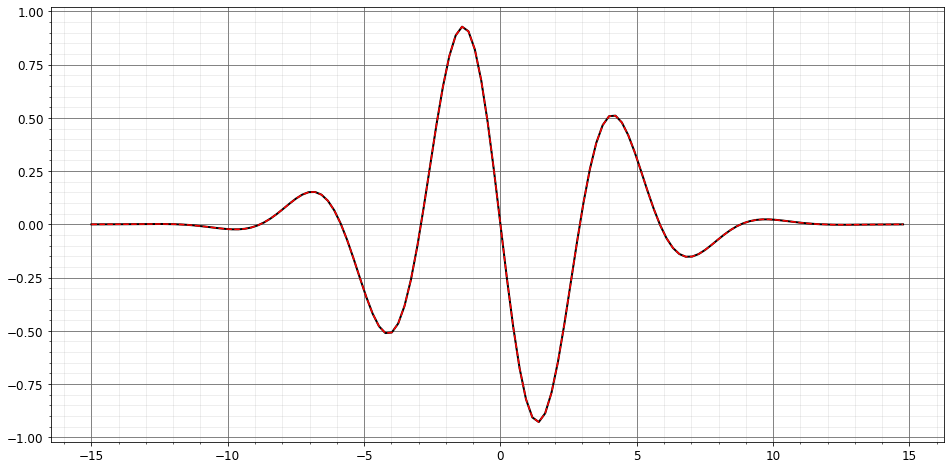

In [4]:
# Plots 
plt.plot(x,df.real,color='k',LineWidth=2, label='True Derivative')
plt.plot(x,dfFFT.real,'--',color='r',LineWidth=1.5, label='FFT Derivative')

# Customize the major grid
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Customize the minor grid
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()